In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

## (C)

In [106]:
data = pd.read_csv('songs.csv')
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [107]:
#(I)
remove_features = ['Artist Name','Track Name','key','mode','time_signature','instrumentalness']
data = data.drop(remove_features,axis=1)
data.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,Class
0,60.0,0.854,0.564,-4.964,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,5
1,54.0,0.382,0.814,-7.230,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,10
2,35.0,0.434,0.614,-8.334,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,6
3,66.0,0.853,0.597,-6.528,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,5
4,53.0,0.167,0.975,-4.279,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,10


In [108]:
#(II)
data = data[(data['Class']== 5) | (data['Class']== 9)]
data['Class'].replace([5,9],[1,-1],inplace=True) #inplace=True는 실제 데이터도 바꿔줌
data = data.reset_index(drop=True)
data

,Popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,Class
0,60.0,0.854,0.564,-4.964,0.0485,0.0171,0.0849,0.899,134.071,234596.0,1
1,66.0,0.853,0.597,-6.528,0.0555,0.0212,0.1220,0.569,107.033,173968.0,1
2,14.0,0.716,0.885,-4.348,0.0333,0.0614,0.2530,0.833,128.043,164093.0,-1
3,34.0,0.585,0.381,-7.622,0.0463,0.4350,0.1260,0.322,143.876,206875.0,-1
4,14.0,0.713,0.939,-3.609,0.0372,0.1100,0.3310,0.880,108.034,179320.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
3966,53.0,0.697,0.777,-3.472,0.0834,0.0107,0.0970,0.555,103.996,151442.0,-1
3967,72.0,0.647,0.844,-3.756,0.0457,0.0137,0.1020,0.746,146.962,193829.0,-1
3968,69.0,0.552,0.846,-4.912,0.3420,0.0114,0.3090,0.554,98.560,236600.0,1
3969,55.0,0.384,0.820,-3.928,0.2010,0.3970,0.1140,0.441,90.712,178605.0,1


In [109]:
#(III)
data = data.dropna()
data.isnull().sum()

Popularity            0
danceability          0
energy                0
loudness              0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
Class                 0
dtype: int64

In [110]:
#(IV)
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:-1], data.iloc[:,-1], test_size=0.3, random_state=23)

In [111]:
#(V)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
#(VI)
X_train = pd.DataFrame(X_train, 
             columns=['Popularity', 
                      'danceability', 
                      'energy', 
                      'loudness', 
                      'speechiness', 
                      'acousticness', 
                      'liveness', 
                      'valence', 
                      'tempo', 
                      'duration_in min/ms'])

X_test = pd.DataFrame(X_test, 
             columns=['Popularity', 
                      'danceability', 
                      'energy', 
                      'loudness', 
                      'speechiness', 
                      'acousticness', 
                      'liveness', 
                      'valence', 
                      'tempo', 
                      'duration_in min/ms'])

Y_train = pd.DataFrame(Y_train, 
             columns=['Class']) 

Y_test = pd.DataFrame(Y_test, 
             columns=['Class']) 

In [113]:
X_train_first = X_train.iloc[0,0:3]
X_train_last = X_train.iloc[-1,0:3]
print("X_train first row is ")
print(X_train_first)
print("\nX_train last row is")
print(X_train_last)

X_test_first = X_test.iloc[0,0:3]
X_test_last = X_test.iloc[-1,0:3]
print("X_test is first row is ")
print(X_test_first)
print("\nX_test last row is")
print(X_test_last)


Y_train_first = Y_train.iloc[0]
Y_train_last = Y_train.iloc[-1]
print("Y_train first row is ")
print(Y_train_first)
print("\nY_train last row is")
print(Y_train_last)

Y_test_first = Y_test.iloc[0]
Y_test_last = Y_test.iloc[-1]
print("Y_test first row is ")
print(Y_test_first)
print("\nY_test last row is")
print(Y_test_last)

X_train is first row is 
Popularity     -0.935558
danceability    0.675193
energy          1.384998
Name: 0, dtype: float64

X_train last row is
Popularity     -1.133015
danceability   -1.094589
energy          0.967024
Name: 2719, dtype: float64
X_test is first row is 
Popularity     -0.293825
danceability    1.360051
energy          0.263068
Name: 0, dtype: float64

X_test last row is
Popularity     -0.293825
danceability   -1.053904
energy         -1.348332
Name: 1165, dtype: float64
Y_train is first row is 
Class   -1
Name: 3293, dtype: int64

Y_train last row is
Class    1
Name: 612, dtype: int64
Y_test is first row is 
Class   -1
Name: 3476, dtype: int64

Y_test last row is
Class    1
Name: 25, dtype: int64


## (d)

#### In homework1 we fit the sklearn.preprocessing.StandardScaler to the entire dataset yet here we are being more careful by only fitting it to the training data. In the context of a real-world prediction problem, explain why what we are doing here is the proper thing to do. What to submit: some commentary.

It is essential to fit the model only with training data, not to the entire dataset.
Because the test set is used to predict the performance of the model on unseen data(real-word data that we don't know).
However, if we build the model with test data, then we use the test set for training the model. 
Hence, test data is no longer unseen data.
So we couldn't check the performance of the model accurately.
And this also could cause the overestimation of the model.
Thus, it is important to fit the model only with the training data.

# (e)

In [114]:
#should be deleted later
c = -1.4
w = 0.1 * np.ones(X_train.shape[1]) 
W = np.insert(w, 0, c)

In [115]:
def reg_log_loss(W, C, X, y):
    c = W[0]#1x1
    w_T = W[1:].reshape(1,X.shape[1]) 
    X = X.values
    Y = y.values
    sum = 0
    
    
    for i in range(0,2720):
        x = X[i].reshape(X.shape[1],1)
        y = Y[i]
        wx = np.dot(w_T,x)
        exponent = -1*y*(wx+c)
        sum = sum + np.logaddexp(0,exponent)
   
    loss = 0.5*(np.linalg.norm(w_T, ord = 2 )**2)+C*sum
    return loss[0]
        

In [116]:
#should be deleted later
loss = reg_log_loss(W, 0.001, X_train, Y_train)
print(loss)

[1.93565389]


In [117]:
w = 0.35 * np.ones(X_train.shape[1])
c=1.2
W = np.insert(w, 0, c)

In [118]:
loss = reg_log_loss(W, 0.001, X_train, Y_train)
print(loss)

[3.29878514]


## (f)

In [119]:
model1 = LogisticRegression(penalty='l2',tol=1e-6,C=0.4,solver='liblinear')
y_train =  Y_train.values.ravel()
model1.fit(X_train,y_train)

LogisticRegression(C=0.4, solver='liblinear', tol=1e-06)

In [120]:
w_hat1 = model.coef_
c_hat1 = model.intercept_
W_hat1 = np.insert(w_hat1,0, c_hat1)

In [49]:
def reg_log_fit(X,y,C):
    w = 0.1 * np.ones(X_train.shape[1])
    W0 = np.insert(w,0, -1.4)
    g = lambda W:  reg_log_loss(W, C, X, y)
    optimize = minimize(g, W0, method="Nelder-Mead", tol=1e-6, options = {'maxfev': 7115})
    return optimize

In [51]:
result1 = reg_log_fit(X_train, Y_train, 0.4) 

In [52]:
result1

 final_simplex: (array([[-0.77035497, -0.30853632,  0.65455425,  0.18467272, -0.19457437,
         1.63567268, -0.34512432,  0.1657955 , -0.3601103 ,  0.00491957,
         0.57886566],
       [-0.770355  , -0.30853677,  0.65455492,  0.18467215, -0.19457457,
         1.63567272, -0.34512459,  0.16579541, -0.36011041,  0.00491962,
         0.57886576],
       [-0.77035523, -0.30853665,  0.65455438,  0.18467293, -0.19457503,
         1.63567333, -0.34512457,  0.16579536, -0.3601105 ,  0.00491962,
         0.57886593],
       [-0.77035535, -0.30853646,  0.65455415,  0.1846733 , -0.19457439,
         1.63567228, -0.34512403,  0.1657947 , -0.36011069,  0.00491932,
         0.57886587],
       [-0.77035535, -0.30853676,  0.65455491,  0.18467306, -0.19457513,
         1.63567251, -0.34512409,  0.16579577, -0.36011068,  0.00491965,
         0.5788655 ],
       [-0.7703551 , -0.3085369 ,  0.65455464,  0.18467348, -0.19457512,
         1.63567265, -0.34512421,  0.16579512, -0.36011048,  0.0049191

In [53]:
optimal_W = result1.x
optimal_W

array([-0.77035497, -0.30853632,  0.65455425,  0.18467272, -0.19457437,
        1.63567268, -0.34512432,  0.1657955 , -0.3601103 ,  0.00491957,
        0.57886566])

### (I) Use the sklearn.metrics.log loss to compute the train and test losses of your resulting model. Recall that the predictions of your model can be calculated using the formula: σ(wˆT xi + cˆ) where xi is a single feature vector.

#### 내가 만든 함수 reg_log_loss를 minimize해서 구한 coefficient를 가지고 y_pred를 구해서 log_loss로 계산하는 방법

In [123]:
def y_pred(W, X):
    c = W[0]
    w = W[1:].reshape(1,X.shape[1]) #1x10
    X = X.values
    Y_predict = []
    
    for i in range(0,X.shape[0]):
        x = X[i]
        wx = np.dot(w,x)
        exponent = -1*(wx+c)
        y_predict = 1/(1 + np.exp(exponent)) #p(y=1|x):hiphop
        Y_predict.append(y_predict)
    return Y_predict   

In [124]:
Y_train_predict = y_pred(optimal_W, X_train)
Y_test_predict = y_pred(optimal_W,X_test)

In [129]:
train_loss = log_loss(Y_train, Y_train_predict)
test_loss = log_loss(Y_test, Y_test_predict)

In [130]:
print("Train loss is {}".format(train_loss))
print("Test loss is {}".format(test_loss))

Train loss is 0.3994921335707408
Test loss is 0.39939623876525937


### (II) Fit a logistic regression model using sklearn.linear model.LogisticRegression and use the parameters: C=1, tol=1e-6, penalty=’l2’, solver=’liblinear’. Com- pute the train and test losses for this model.

#### 그냥 한번에 model을 fit해서 구하는 방법

In [157]:
model = LogisticRegression(penalty='l2',tol=1e-6,C=1,solver='liblinear')
y_train =  Y_train.values.ravel()
model.fit(X_train,y_train)

LogisticRegression(C=1, solver='liblinear', tol=1e-06)

In [158]:
W = np.insert(model.coef_, 0, model.intercept_)
W

array([-0.76991488, -0.31225414,  0.65985006,  0.18671143, -0.19600804,
        1.6489653 , -0.34670163,  0.1674819 , -0.36523069,  0.00552138,
        0.58417585])

In [159]:
train_loss = log_loss(Y_train, y_pred(W, X_train)) 
test_loss = log_loss(Y_test, y_pred(W, X_test))

In [160]:
print("Train loss is {}".format(train_loss))
print("Test loss is {}".format(test_loss))

Train loss is 0.39947109084441795
Test loss is 0.3992719018540252


## (g)

In [224]:
Cs = np.linspace(0.001, 0.2, num=100) #generate the list of C values

### For each value of C, fit the model and store the coefficients of each feature.

In [241]:
coefficients = []
for c in Cs:
    l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=c)
    l1_model.fit(X_train,y_train)
    coef = l1_model.coef_[0] #to aviod double bracket [[]]
    coefficients.append(coef)

In [246]:
coefficients = pd.DataFrame(coefficients)

###  Create a plot with log(C) on the x-axis, and the coefficient value on the y-axis for each feature in each of the fitted models.
#### (Your plot must have a legend clearly representing the different features using the following color scheme: [’red’, ’brown’, ’green’, ’blue’, ’orange’, ’pink’, ’purple’, ’grey’, ’black’, ’y’] )

In [216]:
import matplotlib.pyplot as plt

In [243]:
colors = ['red', 'brown', 'green', 'blue', 'orange', 'pink', 'purple', 'grey', 'black', 'y']
lables = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration']

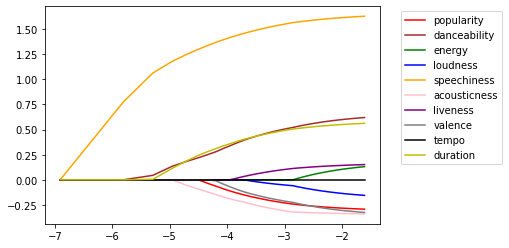

In [244]:
for i in range(10):
    plt.plot(np.log(Cs), coefficients.iloc[:,i], color = colors[i], label = lables[i])
    
plt.legend(bbox_to_anchor = (1.05, 1))

### Based on this plot, explain why l1 regularization can be thought of as performing feature selection,

As we change the log(C), coefficient of each parameter is changed.
Hence, if we want to remove some features then we could drop it by adjusting the value of C.
For example, when log(c) is -7, we only choose speechiness as an feature. 
Because, other feature's coefficients are 0.
Thus, in this way, l1 regularization performs feature selection.

### further comment on which features seem the most important to you (based on the plot) and why.

It seems like speechiness is the the most important feature. Because, it is chosen as an feature no matter what the log(C) is.

# (h)

### We now work through an example of using cross validation to choose the best choice of C based on the data. Specifically, we will use Leave-One-Out Cross Validation (LOOCV). 

###  Create a grid of C values using the code Cs = np.linspace(0.0001, 0.8, num=25)

In [247]:
Cs = np.linspace(0.0001, 0.8, num=25)

### LOOCV is computa- tionally intesive so we will only work with the first 20% of the training data (the first n = 544 observations). 

In [269]:
small_x_train = X_train.iloc[:544]
small_y_train = Y_train.iloc[:544]
small_y_train = small_y_train.reset_index(drop=True)

In [270]:
small_x_train

,Popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms
0,-0.935558,0.675193,1.384998,0.853794,-0.283317,0.347567,1.195610,0.639519,-0.839537,0.002854
1,-0.293825,-0.769112,-2.442763,-1.964013,-0.775845,0.889946,-0.441932,-1.561036,0.706490,-0.534662
2,1.137733,-0.016446,1.071518,0.538745,-0.735321,-0.656403,-0.826693,0.196697,-0.374438,-0.325879
3,-0.590010,-0.274115,-0.902859,-0.832215,0.972940,1.030282,-0.744816,-0.020195,1.065473,0.888450
4,0.199816,1.387174,-0.226401,0.734596,-0.040171,-0.460312,-0.152592,0.933228,0.703872,-0.580907
...,...,...,...,...,...,...,...,...,...,...
539,1.878195,0.349716,0.582048,0.868741,-0.708044,-0.975156,-0.448089,0.485887,0.056843,-2.347198
540,-1.231743,-1.664174,-1.023852,-0.216682,-0.503084,2.099870,-0.582909,-1.163400,-1.050516,0.444136
541,-0.047005,1.427859,-0.429889,-0.156125,-0.133689,-0.509620,-0.429620,-0.711540,-0.961326,-0.120965
542,0.693457,-0.389388,1.198010,0.894420,2.874472,-0.834668,0.395308,1.136565,1.976234,0.199393


In [271]:
small_y_train

,Class
0,-1
1,-1
2,-1
3,1
4,1
...,...
539,-1
540,-1
541,1
542,1


### For a given C value, fit the logistic regression model with l1 penalty on the dataset with point i removed. You should have a total of n models for each C value.
### For your i-th model (the one trained by leaving out point i) compute the leave-one-out error of predicting yi (the log-loss of predicting the left out point).
#### (you are permitted to use sklearn.LogisticRegression to fit the models, and sklearn.metrics.log loss to compute the losses )
 
### Average the losses over all n choics of i to get your CV score for that particular choice of C.

In [276]:
avg_loss = []
for c in Cs:
    loss_sum = 0
    _model = LogisticRegression(penalty='l1',solver='liblinear', C=c)
    for i in range(544):
        x_tr = small_x_train.drop(index = i).values
        y_tr = small_y_train.drop(index = i).values.ravel()
        
        x_ts = small_x_train.iloc[i].values.reshape(1, -1)
        y_ts = small_y_train.iloc[i].values.ravel()  
        
        _model.fit(x_tr,y_tr)
        y_pred = _model.predict_proba(x_ts)
        loss_ = log_loss(y_ts, y_pred, labels = (-1,1))
        loss_sum = loss_sum + loss_
    avg = loss_sum / 544
    avg_loss.append(avg)  

In [277]:
avg_loss

[0.6931471805599468,
 0.4559380008456632,
 0.424744495113735,
 0.4160003197984372,
 0.4115927406544707,
 0.4082793799414353,
 0.4063043541413416,
 0.40510292840435996,
 0.40432995475449374,
 0.4038201899448722,
 0.4035133324604438,
 0.4033523430310938,
 0.4032974128596377,
 0.40333250464210607,
 0.4034442872142655,
 0.40361768359013755,
 0.4038383353497826,
 0.40401305637471807,
 0.4041432461446842,
 0.4042393648219504,
 0.4043164339417271,
 0.4043839815202266,
 0.4044403968847153,
 0.40449035449776766,
 0.40453482651537837]

### Plot the leave-one-out error against C and report the best C value.

Text(0, 0.5, 'loss')

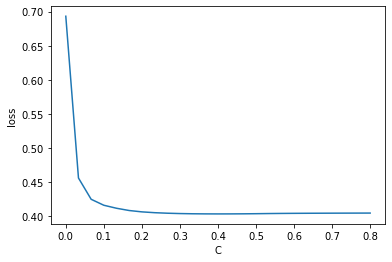

In [278]:
plt.plot(Cs, avg_loss)
plt.xlabel("C")                                    
plt.ylabel("loss")

In [41]:
Cs

array([1.00000000e-04, 3.34291667e-02, 6.67583333e-02, 1.00087500e-01,
       1.33416667e-01, 1.66745833e-01, 2.00075000e-01, 2.33404167e-01,
       2.66733333e-01, 3.00062500e-01, 3.33391667e-01, 3.66720833e-01,
       4.00050000e-01, 4.33379167e-01, 4.66708333e-01, 5.00037500e-01,
       5.33366667e-01, 5.66695833e-01, 6.00025000e-01, 6.33354167e-01,
       6.66683333e-01, 7.00012500e-01, 7.33341667e-01, 7.66670833e-01,
       8.00000000e-01])

Thus, the best c is the biggest value among Cs which is 0.8. Since the loss are mostly small at that point

# Question2

In [215]:
import numpy as np
import pandas as pd # not really needed, only for preference
import matplotlib.pyplot as plt 
from util import *
#plot perceptron function that automatically plots a scatter of the data as well as your perceptron model.

In [279]:
X = pd.read_csv('PerceptronX.csv', header=None)
Y = pd.read_csv('Perceptrony.csv',header=None)

### Write a function that implements the perceptron algorithm and run it on X, y. Your implementa- tion should be based on the following pseudo-code:

In [280]:
w0 = np.zeros(3) #3,
w0.ravel()

array([0., 0., 0.])

In [282]:
def perceptron(X, y, max_iter=100):
    np.random.seed(1)
    w = np.zeros(3)
    nmb_iter = 0
    converged = False
    while converged == False:
        converged = True
        nmb_iter = nmb_iter + 1
        misscl = [] 
        
        if nmb_iter > max_iter:
            break
        
        for i in range(0,82):
            x = X.iloc[i].values
            y = Y.iloc[i].values
            xy = np.insert(y, 0, x)
            wx = np.dot(w,x)
            
            if y*wx <= 0:
                misscl.append(xy)
                converged = False
            
        if converged == False:
            ind = np.random.choice(len(misscl)) #pick a random index
            random_row = misscl[ind] # pick a corresponding row
            x_ = random_row[:-1]
            y_ = random_row[-1]
            w = w + y_*x_
        
    return w, nmb_iter-1    

In [283]:
w, nmb_iter = perceptron(X, Y, max_iter=100)

In [284]:
w

array([ 4.        ,  4.37835008, -3.32545901])

In [285]:
nmb_iter

22

In [286]:
def plot_perceptron2(ax, X, y, w):
    pos_points = X.iloc[np.where(Y==1)[0]]
    neg_points = X.iloc[np.where(y==-1)[0]]
    ax.scatter(pos_points.iloc[:, 1], pos_points.iloc[:, 2], color='blue')
    ax.scatter(neg_points.iloc[:, 1], neg_points.iloc[:, 2], color='red')
    xx = np.linspace(-6,6)
    yy = -w[0]/w[2] - w[1]/w[2] * xx
    ax.plot(xx, yy, color='orange')
    ratio = (w[2]/w[1] + w[1]/w[2])
    xpt = (-1*w[0] / w[2]) * 1/ratio
    ypt = (-1*w[0] / w[1]) * 1/ratio
    
    ax.arrow(xpt, ypt, w[1], w[2], head_width=0.2, color='orange')
    ax.axis('equal')

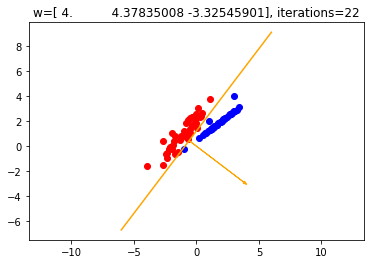

In [287]:
fig, ax = plt.subplots()
plot_perceptron2(ax, X, Y, w) 
ax.set_title(f"w={w}, iterations={nmb_iter}")
plt.show()

##  (b)

In [288]:
Gram = X@X.T
#Gram

In [289]:
def dual_perceptron(X, y, max_iter=100):
    np.random.seed(1)
    alpha = alpha = np.zeros(82)
    nmb_iter = 0
    converged = False
    while converged == False:
        converged = True
        nmb_iter = nmb_iter + 1
        misscl_i = [] 
        
        if nmb_iter > max_iter:
            break
        
        for i in range(0,82):
            sum = 0 #나중에 위치 확인하기
            x_i = X.iloc[i].values
            y_i = Y.iloc[i].values
            #xy = np.insert(y_i, 0, x_i)
            
            for j in range(0,82):
                y_j = Y.iloc[j].values
                a_j = alpha[j]
                sum = sum + a_j*y_j*Gram.loc[j,i]
            
            condition = y_i * sum
            if condition <= 0:
                misscl_i.append(i)
                converged = False
        #print(converged)   
        if converged == False:
            ind = np.random.choice(len(misscl_i)) #pick a random index
            random_row = misscl_i[ind] # pick a corresponding row
            alpha[random_row] = alpha[random_row]+1
    return alpha, nmb_iter-1

In [290]:
alpha, t = dual_perceptron(X, Y, max_iter=100)

In [291]:
alpha

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 2., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 0.,
       0., 0., 8., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [292]:
t

22

In [293]:
w_ = np.zeros(3)
for i in range(0,82):
    a_i = alpha[i]
    x_i = X.iloc[i].values
    y_i = Y.iloc[i].values
    w_ = w_ + a_i*y_i*x_i
W = w
print(W)

[ 4.          4.37835008 -3.32545901]


## Provide a plot of your final perceptron as in the previous part (using the same title format),

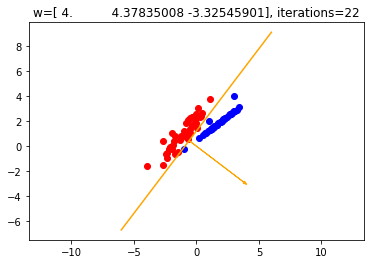

In [294]:
fig, ax = plt.subplots()
plot_perceptron2(ax, X, Y, W) 
ax.set_title(f"w={w}, iterations={t}")
plt.show()

## provide a plot with x-axis representing each of the i = 1, . . . , n points, and y-axis representing the value αi.

In [295]:
i = np.linspace(1,82,82)

In [296]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

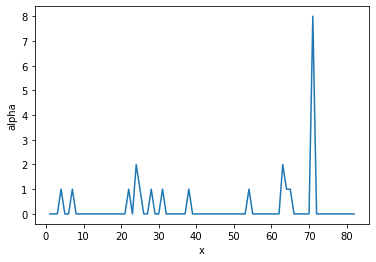

In [297]:
plt.plot(i,alpha)
plt.xlabel('x')
plt.ylabel('alpha')
plt.show()

### (c)

In [298]:
def rperceptron(X, y, max_iter=100):
    np.random.seed(1)
    w = np.zeros(3)
    I = np.zeros(82)
    nmb_iter = 0
    converged = False
    
    while converged == False:
        #print(I)
        converged = True
        nmb_iter = nmb_iter + 1
        misscl = [] 
        
        if nmb_iter > max_iter:
            break
        
        for i in range(0,82):
            x = X.iloc[i].values
            y = Y.iloc[i].values
            xy = np.insert(y, 0, x)
            wx = np.dot(w,x)
        
            if y*wx + 2*I[i] <= 0:
                misscl.append(i)
                converged = False
                
        if converged == False:
            ind = np.random.choice(len(misscl)) #pick a random index of misscl
            random_ind = misscl[ind] # find the random index in terms of i
            I[random_ind] = 1      

            x_ = X.iloc[random_ind].values
            y_ = Y.iloc[random_ind].values
    
            w = w + y_*x_
              
    return w, nmb_iter-1         

In [300]:
r_w, r_nmb_iter = rperceptron(X, Y, max_iter=100)

In [301]:
r_w

array([ 2.        ,  4.31842869, -2.16285772])

In [302]:
r_nmb_iter

10

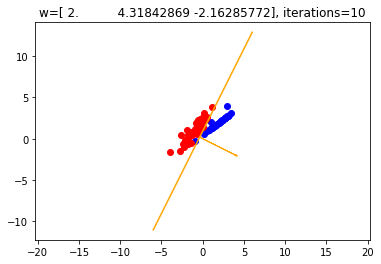

In [303]:
fig, ax = plt.subplots()
plot_perceptron2(ax, X, Y, r_w) 
ax.set_title(f"w={r_w}, iterations={r_nmb_iter}")
plt.show()

### (d)

### Derive a dual version of the rPerceptron algorithm and describe it using pseudo-code (use the template pseudocode from the previous parts to get an idea of what is expected here). Implement your algorithm in code (using the same randomization steps as above) and run it on X, y with r = 2. Produce the same two plots as requested in part (b). What to submit: a pseudocode description of your algorithm, two plots, a screen shot of your code used for this section, a copy of your code in solutions.py

In [304]:
def rdual_perceptron(X, y, max_iter=100):
    np.random.seed(1)
    alpha = alpha = np.zeros(82)
    nmb_iter = 0
    I = np.zeros(82)
    converged = False
    while converged == False:
        converged = True
        nmb_iter = nmb_iter + 1
        misscl_i = [] 
        
        if nmb_iter > max_iter:
            break
        
        for i in range(0,82):
            sum = 0 #나중에 위치 확인하기
            x_i = X.iloc[i].values
            y_i = Y.iloc[i].values
            
            for j in range(0,82):
                y_j = Y.iloc[j].values
                a_j = alpha[j]
                sum = sum + a_j*y_j*Gram.loc[j,i]
            
            condition = y_i * sum + 2*I[i]
            if condition <= 0:
                misscl_i.append(i)
                converged = False
        
        if converged == False:
            ind = np.random.choice(len(misscl_i)) #pick a random index of misscl_i
            random_ind = misscl_i[ind] # pick a random index of data
            I[random_ind] = 1 
            alpha[random_ind] = alpha[random_ind]+1
            
    return alpha, nmb_iter-1

In [305]:
r_alpha, rnmb_iter = rdual_perceptron(X, Y, max_iter=100)

In [306]:
r_alpha

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [307]:
rnmb_iter

10

In [308]:
w_ = np.zeros(3)
for i in range(0,82):
    a_i = r_alpha[i]
    x_i = X.iloc[i].values
    y_i = Y.iloc[i].values
    w_ = w_ + a_i*y_i*x_i
    #print(w_)
W = w_
print(W)

[ 2.          4.31842869 -2.16285772]


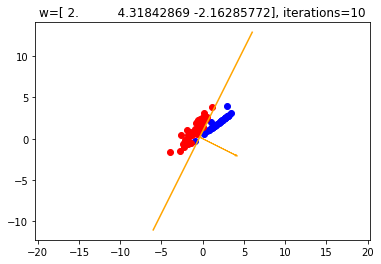

In [309]:
fig, ax = plt.subplots()
plot_perceptron2(ax, X, Y, W) 
ax.set_title(f"w={W}, iterations={rnmb_iter}")
plt.show()

In [311]:
i = np.linspace(1,82,82)

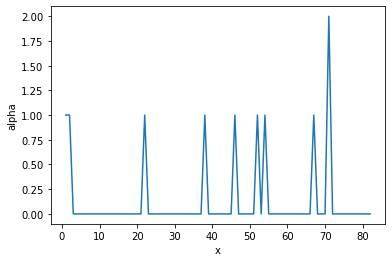

In [312]:
plt.plot(i,r_alpha)
plt.xlabel('x')
plt.ylabel('alpha')
plt.show()